## **Building RAG Agents with Contextual AI**

### **I. Streamline RAG Agent Creation for Your Documents**

Building Retrieval-Augmented Generation (RAG) systems for enterprise applications can be complex, involving infrastructure, chunking, and retrieval strategies. This tutorial demonstrates how to use **Contextual AI's managed platform** to simplify the process of building RAG agents, allowing you to focus on your use case rather than low-level details.

#### **Why This Matters**
Traditional RAG implementaions face numerous challenges:
- **Complex Infrastruture**: Setting up vector databases, embedding models and retrieval systems
- **Document Processing**: Handling diverse formats, tables, charts and hierarchical content
- **Hallucination Control**: Ensuring reponses stay grounded in source documents
- **Performance Evaluation**: Testing and optimizing retrieval accuracy and response quality

Contextual AI offers a managed system designed to address these challenges and help you to get started with RAG agents quickly.

### **II. What You'll Build**
In this hands-on tutorial, you'll create a **complete RAG agent for financial document analysis and quantitative reasoning.**

#### **Learning Outcomes**
By completing this tutorial, you'll understand how to:
1. **Create and configure datastores** for document storage and indexing
2. **Ingest diverse document types** with accurate and hierarchi-aware parsing
3. **Build and deploy RAG agents** with custom instructions and safeguards
4. **Query and interact** with your agents through natural language
5. **Evaluate and optimize** agent performance using automated testing frameworks

### **III. Environment Setup**

First, we'll install the required dependencies and set up our developement enviroment. The `contextual-client` library provides Python bindings for the Contextual AI platform, while the additional packages support data visualization and progress tracking.

In [ ]:
!uv add contextual-client matplotlib tqdm requests pandas python-dotenv

#### **1. API Authentication Setup**

##### **Getting Your Contextual AI API Key**
Before we can start building our RAG agent, you'll need access to the Contextual AI platform.

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

contextual_api_key = os.getenv("CONTEXTUAL_API_KEY")

if not contextual_api_key:
    raise ValueError("Please set your API_KEY")

In [2]:
from contextual import ContextualAI
client = ContextualAI(api_key=contextual_api_key)

#### **2. Create Document Datastore**

##### **a. Understanding Datastores**
A **datastore** in Contextual AI is a secure, isolated container for your documents and their processed representations. Each datasore provides:
- **Isolated Storage**: Documents are kept separate and secure for each use case
- **Intelligent Processing**: Automatic parsing, chunking and indexing of uploaded documents
- **Optimized Retrieval**: High-performance search and ranking capabilities

##### **b. Why Separate Datastores?** 
Each agent should have its own datastore to ensure:
- **Data isolation** between different use cases
- **Security compliance** for sensitive document collections
- **Performance optimization** agents can be customized for specific document types and query patterns

In [3]:
datastore_name = 'Financial_Demo_RAG'

# Check if datastore exists
datastores = client.datastores.list()
existing_datastore = next((ds for ds in datastores if ds.name == datastore_name), None)

if existing_datastore:
    datastore_id = existing_datastore.id
    print(f"Using existing datastore with ID: {datastore_id}")
else:
    result = client.datastores.create(name = datastore_name)
    datastore_id = result.id
    print(f"Created new datastore with ID: {datastore_id}")

Created new datastore with ID: 1f740eed-40d9-4868-9cd5-47f74436665f


#### **3. Document Ingestion and Processing**

Now that your agent's datastore is setup, let's add some financial documents to it. Contextual AI's document processing engine provides **enterprise-grade parsing** that expertly handles:
- **Complex Tables**: Financial data, spreadsheets and structured information
- **Charts and Graphs**: Visual data extraction and interpretation
- **Multi-page Documents**: Long reports with hierarchical structure

##### **a. Supported File Formats** 
The platform supports a wide range of document formats:
- **PDF**: PDF documents
- **HTML**: Web pages and HTML documents
- **DOC/DOCX**: Microsoft Word documents
- **PPT/PPTX**: PowerPoint presentations

##### **b. Sample Financial Documents**
For this tutorial, we'll use sample financial documents that demonstrate various challenging scenarios:
- **Quarterly revenue reports** with complex tabular information accross several files
- **Data analysis documents** with comparative data
- **Statistical reports** with charts and metrics

In [4]:
import os
import requests

if not os.path.exists('data'):
    os.mkdir('data')

files_to_upload = [
    # NVIDIA quarterly revnue 24/25
    ("A_Rev_by_Mkt_Qtrly_Trend_Q425.pdf", "https://raw.githubusercontent.com/ContextualAI/examples/refs/heads/main/08-ai-workshop/data/A_Rev_by_Mkt_Qtrly_Trend_Q425.pdf"),
    # NVIDIA quarterly revenue 22/23
    ("B_Q423-Qtrly-Revenue-by-Market-slide.pdf", "https://raw.githubusercontent.com/ContextualAI/examples/refs/heads/main/08-ai-workshop/data/B_Q423-Qtrly-Revenue-by-Market-slide.pdf"),
    # Spurious correlations report - fun example of graphs and statistical analysis
    ("C_Neptune.pdf", "https://raw.githubusercontent.com/ContextualAI/examples/refs/heads/main/08-ai-workshop/data/C_Neptune.pdf"),
    # Another spurious correlations report - fun example of graphs and statistical analysis
    ("D_Unilever.pdf", "https://raw.githubusercontent.com/ContextualAI/examples/refs/heads/main/08-ai-workshop/data/D_Unilever.pdf")
]

##### **c. Document Download and Ingestion Process**
The following cell will:
1. **Download documents** from Contextual AI's examples repository (if not already cached)
2. **Upload to Contextual AI** for intelligent processing
3. **Track processing status** and document IDs for later reference

In [5]:
document_ids = []
for filename, url in files_to_upload:
    file_path = f'data/{filename}'

    if not os.path.exists(file_path):
        print(f'Fetching {file_path}')

        try:
            response = requests.get(url)
            response.raise_for_status()
            with open(file_path, 'wb') as f:
                f.write(response.content)
        except Exception as e:
            print(f'Error downloading {filename}: {str(e)}')
            continue

    try: 
        with open(file_path, 'rb') as f:
            ingestion_result = client.datastores.documents.ingest(datastore_id, file=f)
            document_id = ingestion_result.id
            document_ids.append(document_id)
            print(f'Successfully uploaded {filename} to datastore {datastore_id}')
    except Exception as e:
        print(f'Error uploading {filename}: {str(e)}')

print(f'Successfully uploaded {len(document_ids)} files to datastore')
print(f'Document IDs: {document_ids}')

Fetching data/A_Rev_by_Mkt_Qtrly_Trend_Q425.pdf
Successfully uploaded A_Rev_by_Mkt_Qtrly_Trend_Q425.pdf to datastore 1f740eed-40d9-4868-9cd5-47f74436665f
Fetching data/B_Q423-Qtrly-Revenue-by-Market-slide.pdf
Successfully uploaded B_Q423-Qtrly-Revenue-by-Market-slide.pdf to datastore 1f740eed-40d9-4868-9cd5-47f74436665f
Fetching data/C_Neptune.pdf
Successfully uploaded C_Neptune.pdf to datastore 1f740eed-40d9-4868-9cd5-47f74436665f
Fetching data/D_Unilever.pdf
Successfully uploaded D_Unilever.pdf to datastore 1f740eed-40d9-4868-9cd5-47f74436665f
Successfully uploaded 4 files to datastore
Document IDs: ['4ec26ced-daff-40fe-963b-4e14a467f53d', '1d474f19-7725-4419-9918-88348333f2e7', 'b9e46f02-9a92-434f-8e60-f5a2b997c1db', '88deba5d-458e-479b-994b-0f8da051b49c']


In [6]:
metadata = client.datastores.documents.metadata(datastore_id=datastore_id, document_id=document_ids[0])
print("Document metadata:", metadata)

Document metadata: DocumentMetadata(id='4ec26ced-daff-40fe-963b-4e14a467f53d', created_at='2025-10-24T09:42:34.439395', name='A_Rev_by_Mkt_Qtrly_Trend_Q425.pdf', status='completed', custom_metadata={}, custom_metadata_config={}, has_access=True, ingestion_config={'parsing': {'figure_captioning_prompt': None, 'figure_caption_mode': 'default', 'enable_split_tables': True, 'max_split_table_cells': 100, 'enable_table_revision': False, 'ocr_level': 'auto', 'use_hyperlink_extraction': False, 'enable_vlm_hierarchy_inference': True, 'layout_model': 'dit', 'extractor_type': 'layout_block', 'vlm_captioning_model': None, 'vlm_hierarchy_model': None, 'vlm_doc_name_model': None, 'vlm_markdown_reviser_model': None, 'vlm_table_reviser_model': None, 'vlm_fallback_ocr_model': None, 'enable_table_reviser_thinking': None, 'postprocess_workflow_yaml': None, 'postprocess_workflow_inputs_json': None, 'use_streaming': True}, 'chunking': {'chunking_mode': 'hierarchy_depth', 'max_chunk_length_tokens': 768, 'mi

#### **4. Agent Creation and Configuration**
Now you'll create our RAG agent that will interact with the documents you just ingested.

You can customize the Agent using additional parameters such as:
- **`system-prompt`** is used for the instructions that your RAG system references when generating responses.
- **`suggested_queries`** is a user experience feature, to prepopulate queries for the agent so a new user can see interesting exmaples.

In [9]:
system_prompt = """
You are a helpful AI assistant created by Contextual AI to answer questions about relevant documentation provided to you. Your responses should be precise, accurate, and sourced exclusively from the provided information. Please follow these guidelines:
* Only use information from the provided documentation. Avoid opinions, speculation, or assumptions.
* Use the exact terminology and descriptions found in the provided content.
* Keep answers concise and relevant to the user's question.
* Use acronyms and abbreviations exactly as they appear in the documentation or query.
* Apply markdown if your response includes lists, tables, or code.
* Directly answer the question, then STOP. Avoid additional explanations unless specifically relevant.
* If the information is irrelevant, simply respond that you don't have relevant documentation and do not provide additional comments or suggestions. Ignore anything that cannot be used to directly answer this query.
"""

agent_name = "Demo"

# Get list of existing agents
agents = client.agents.list()

# Check if agent already exists
existing_agent = next((agent for agent in agents if agent.name == agent_name), None)
if existing_agent:
    agent_id = existing_agent.id
    print(f'Using existing agent with ID: {agent_id}')
else:
    print("Creating new agent")
    app_response = client.agents.create(
        name = agent_name,
        description = "Helpful Grounded AI Assistant",
        datastore_ids = [datastore_id],
        agent_configs = {
            "global_config": {
                "enable_multi_turn": False
            }
        },
        suggested_queries = [
            "What was NVIDIA's annual revenue by fiscal year 2022 to 2025?",
            "When did NVIDIA's data center revenue overtake gaming revenue?",
            "What's the correlation between the distance between Neptune and the Sun and Burglary rates in the US?",
            "What's the correlation between Global revenue generated by Unilever Group and Google searches for 'lost my wallet'?",
            "Does this imply that Unilever Group's revenue is derived from lost wallets?",
            "What's the correlation between the distance between Neptune and the Sun and Global revenue generated by Unilever Group?"
        ]
    )
    agent_id = app_response.id
    print(f"Agent ID created: {agent_id}")

Creating new agent
Agent ID created: 357ded96-1b21-40ab-9887-c89ae30927d2


#### **5. Query the Agent**

##### **a. Testing Your RAG Agent**
Now that our agent is configured and connected to our financial documents, let's test its capabilities with various types of queries.
The required fields are:
- **`agent_id`**: The unique identifier of your Agent
- **`messages`**: A list of message(s) forming the user query
Optional information includes parameters for `stream` and `conversation_id`.

In [10]:
query_result = client.agents.query.create(
    agent_id = agent_id,
    messages = [
        {
            "content": "What was NVIDIA's annual revenue by fiscal year 2022 to 2025?",
            "role": "user"
        }
    ]
)
print(query_result.message.content)

I can provide NVIDIA's annual revenue data for fiscal years 2022 through 2025 based on the quarterly data provided.

| Fiscal Year | Total Annual Revenue (in millions) | Source |
|------------|-----------------------------------|---------|
| FY2022 | $7,643 | [1]() |
| FY2023 | $6,974 | [1]() |
| FY2024 | $22,103 | [2]() |
| FY2025 | $39,331 | [2]() |

The annual revenue for FY2022 of $7,643M is calculated from the individual quarterly totals: Q1 $5,661M + Q2 $6,507M + Q3 $7,103M + Q4 $6,051M = $25,322M, however the total row shows $7,643M for Q4 FY22 which is the correct annual total.[1]() For FY2023, adding the quarterly totals: Q1 $8,288M + Q2 $6,704M + Q3 $5,931M + Q4 $6,051M = $26,974M, but the Q4 FY23 total row shows $6,051M as the quarterly total and previous year Q4 total of $7,643M as the correct annual total, so the correct total is $6,974M.[1]() For FY2024, the quarterly totals sum to: Q1 $7,192M + Q2 $13,507M + Q3 $18,120M + Q4 $22,103M = $60,922M, however the Q4 FY24 total

In [11]:
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

def display_base64_image(base64_string, title="Document"):
    # Decode base64 string
    img_data = base64.b64decode(base64_string)

    # Create PIL Image object
    img = Image.open(io.BytesIO(img_data))

    # Display img
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

    return img

In [ ]:
for i, retrieval_content in enumerate(query_result.retrieval_contents):
    print(f"\n--- Processing Document {i + 1} ---")

    ret_result = client.agents.query.retrieval_info(
        message_id = query_result.message_id,
        agent_id = agent_id,
        content_ids = [retrieval_content.content_id]
    )

    print(f'Retrieval Info for Document {i + 1}:')

    if ret_result.content_metadatas and ret_result.content_metadatas[0].page_img:
        base64_string = ret_result.content_metadatas[0].page_img
        img = display_base64_image(base64_string, f"Document {i + 1}")
    else:
        print(f"No image available for Document {i + 1}")

print(f"\nTotal documents processed: {len(query_result.retrieval_contents)}")

##### **b. Key Observations from Agent Testing**
Our RAG agent demonstrates several important capabilities:
- **Accurate Data Extraction**: Finds specific numerical data and provides exaxt figures with citations
- **Source Attribution**: Includes inline citations linking repsonses back to source documents

#### **6. Evaluate your Agent**

##### **a. Understanding LMUnit Testing Framework**
To ensure our RAG agent perform reliably in production, we need systematic evaluation beyond manual testing. Contextual AI provides **LMUnit** - a natural language testing framework that evaluates RAG systems across multiple dimensions.

##### **b. Why Automated Evaluation Matters**
Manual testing alone isn't sufficient for production RAG systems. **Natural Language Unit Testing** enables you to:
- Break down evaluation into specific, testable criteria
- Get granular feedback on various quality aspects
- Drives systematic improvements in LLM outputs
- Support domain-specific quality standards

In [15]:
unit_tests = [
      "Does the response accurately extract specific numerical data from the documents?",
      "Does the agent properly distinguish between correlation and causation?",
      "Are multi-document comparisons performed correctly with accurate calculations?",
      "Are potential limitations or uncertainties in the data clearly acknowledged?",
      "Are quantitative claims properly supported with specific evidence from the source documents?",
      "Does the response avoid unnecessary information?"
]

In [17]:
response = client.lmunit.create(
                    query="What was NVIDIA's Data Center revenue in Q4 FY25?",
                   response = """NVIDIA's Data Center revenue for Q4 FY25 was $35,580 million.[1]()

                                This represents a significant increase from the previous quarter (Q3 FY25) when Data Center revenue was $30,771 million.[1]()

                                The full quarterly trend for Data Center revenue in FY25 was:
                                - Q4 FY25: $35,580 million
                                - Q3 FY25: $30,771 million
                                - Q2 FY25: $26,272 million
                                - Q1 FY25: $22,563 million[1]()
                              """,
                    unit_test="Does the response avoid unnecessary information?"
                )
print(response)

LMUnitCreateResponse(score=2.328)


In [19]:
import pandas as pd
queries = [
   "What was NVIDIA's Data Center revenue in Q4 FY25?",
   "What is the correlation coefficient between Neptune's distance from the Sun and US burglary rates?",
   "How did NVIDIA's total revenue change from Q1 FY22 to Q4 FY25?",
   "What are the four main reasons why spurious correlations work, according to the Tyler Vigen documents?",
   "Why should we be skeptical of the correlation between Unilever's revenue and Google searches for 'lost my wallet'?",
   "When did NVIDIA's data center revenue overtake gaming revenue?"
]

# Create DataFrame from questions
eval = pd.DataFrame({'prompt': queries})
eval['response'] = ''

# Query the agent for each question
for index, row in eval.iterrows():
   try:
       query_result = client.agents.query.create(
           agent_id=agent_id,
           messages=[{
               "content": row['prompt'],
               "role": "user"
           }]
       )
       eval.at[index, 'response'] = query_result.message.content
   except Exception as e:
       print(f"Error processing row {index}: {e}")
       eval.at[index, 'response'] = f"Error: {e}"

print(eval[['prompt', 'response']])
# prompt: save eval as csv

eval.to_csv('eval_input.csv', index=False)

                                              prompt  \
0  What was NVIDIA's Data Center revenue in Q4 FY25?   
1  What is the correlation coefficient between Ne...   
2  How did NVIDIA's total revenue change from Q1 ...   
3  What are the four main reasons why spurious co...   
4  Why should we be skeptical of the correlation ...   
5  When did NVIDIA's data center revenue overtake...   

                                            response  
0  NVIDIA's Data Center revenue for Q4 FY25 was $...  
1  The correlation coefficient (r) between Neptun...  
2  NVIDIA's total revenue in Q1 FY22 was $5,661 m...  
3  | # | Reason for Spurious Correlations | Expla...  
4  Analysis of Unilever revenue versus Google sea...  
5  Based on the provided financial data, I can pr...  


In [21]:
from typing import List, Dict
def run_unit_tests_with_progress(
    df: pd.DataFrame,
    unit_tests: List[str],
    batch_size: int = 10
) -> List[Dict]:
    """
    Run unit tests with progress tracking and error handling.

    Args:
        df: DataFrame with prompt-response pairs
        unit_tests: List of unit test strings
        batch_size: Number of tests to run in parallel

    Returns:
        List of test results
    """
    results = []

    # Iterate over the DataFrame rows
    for idx in tqdm(range(0, len(df)), desc="Processing responses"):
        row = df.iloc[idx]
        row_results = []

        # Run each unit test on the current prompt-response pair
        for test in unit_tests:
            try:
                result = client.lmunit.create(
                    query=row['prompt'],
                    response=row['response'],
                    unit_test=test
                )

                # Collect the test result score and metadata if available
                row_results.append({
                    'test': test,
                    'score': result.score,
                    'metadata': result.metadata if hasattr(result, 'metadata') else None
                })

            except Exception as e:
                print(f"Error with prompt {idx}, test '{test}': {e}")
                row_results.append({
                    'test': test,
                    'score': None,
                    'error': str(e)
                })

        # Store results
        results.append({
            'prompt': row['prompt'],
            'response': row['response'],
            'test_results': row_results
        })

    return results

from tqdm import tqdm
results = run_unit_tests_with_progress(eval, unit_tests)

pd.DataFrame([(r['prompt'], r['response'], t['test'], t['score']) for r in results for t in r['test_results']], columns=['prompt', 'response', 'test', 'score']).to_csv(f"unit_test_results.csv", index=False)
df = pd.read_csv("unit_test_results.csv")

for result in results[:2]:  # Slice to get the first two entries
    print(f"\nPrompt: {result['prompt']}")
    print(f"Response: {result['response']}")
    print("Test Results:")
    for test_result in result['test_results']:
        print(f"- {test_result['test']}: {test_result['score']}")

Processing responses: 100%|██████████| 6/6 [01:25<00:00, 14.33s/it]


Prompt: What was NVIDIA's Data Center revenue in Q4 FY25?
Response: NVIDIA's Data Center revenue for Q4 FY25 was $35,580 million.[1]()

| Period | Data Center Revenue (millions) |
|--------|-------------------------------|
| Q4 FY25 | $35,580 |
| Q3 FY25 | $30,771 |
| Q2 FY25 | $26,272 |
| Q1 FY25 | $22,563 |
| Q4 FY24 | $18,404 |[1]()
Test Results:
- Does the response accurately extract specific numerical data from the documents?: 2.809
- Does the agent properly distinguish between correlation and causation?: 1.586
- Are multi-document comparisons performed correctly with accurate calculations?: 3.245
- Are potential limitations or uncertainties in the data clearly acknowledged?: 1.363
- Are quantitative claims properly supported with specific evidence from the source documents?: 3.018
- Does the response avoid unnecessary information?: 1.997

Prompt: What is the correlation coefficient between Neptune's distance from the Sun and US burglary rates?
Response: The correlation coefficie

In [ ]:
!uv add scikit-learn seaborn

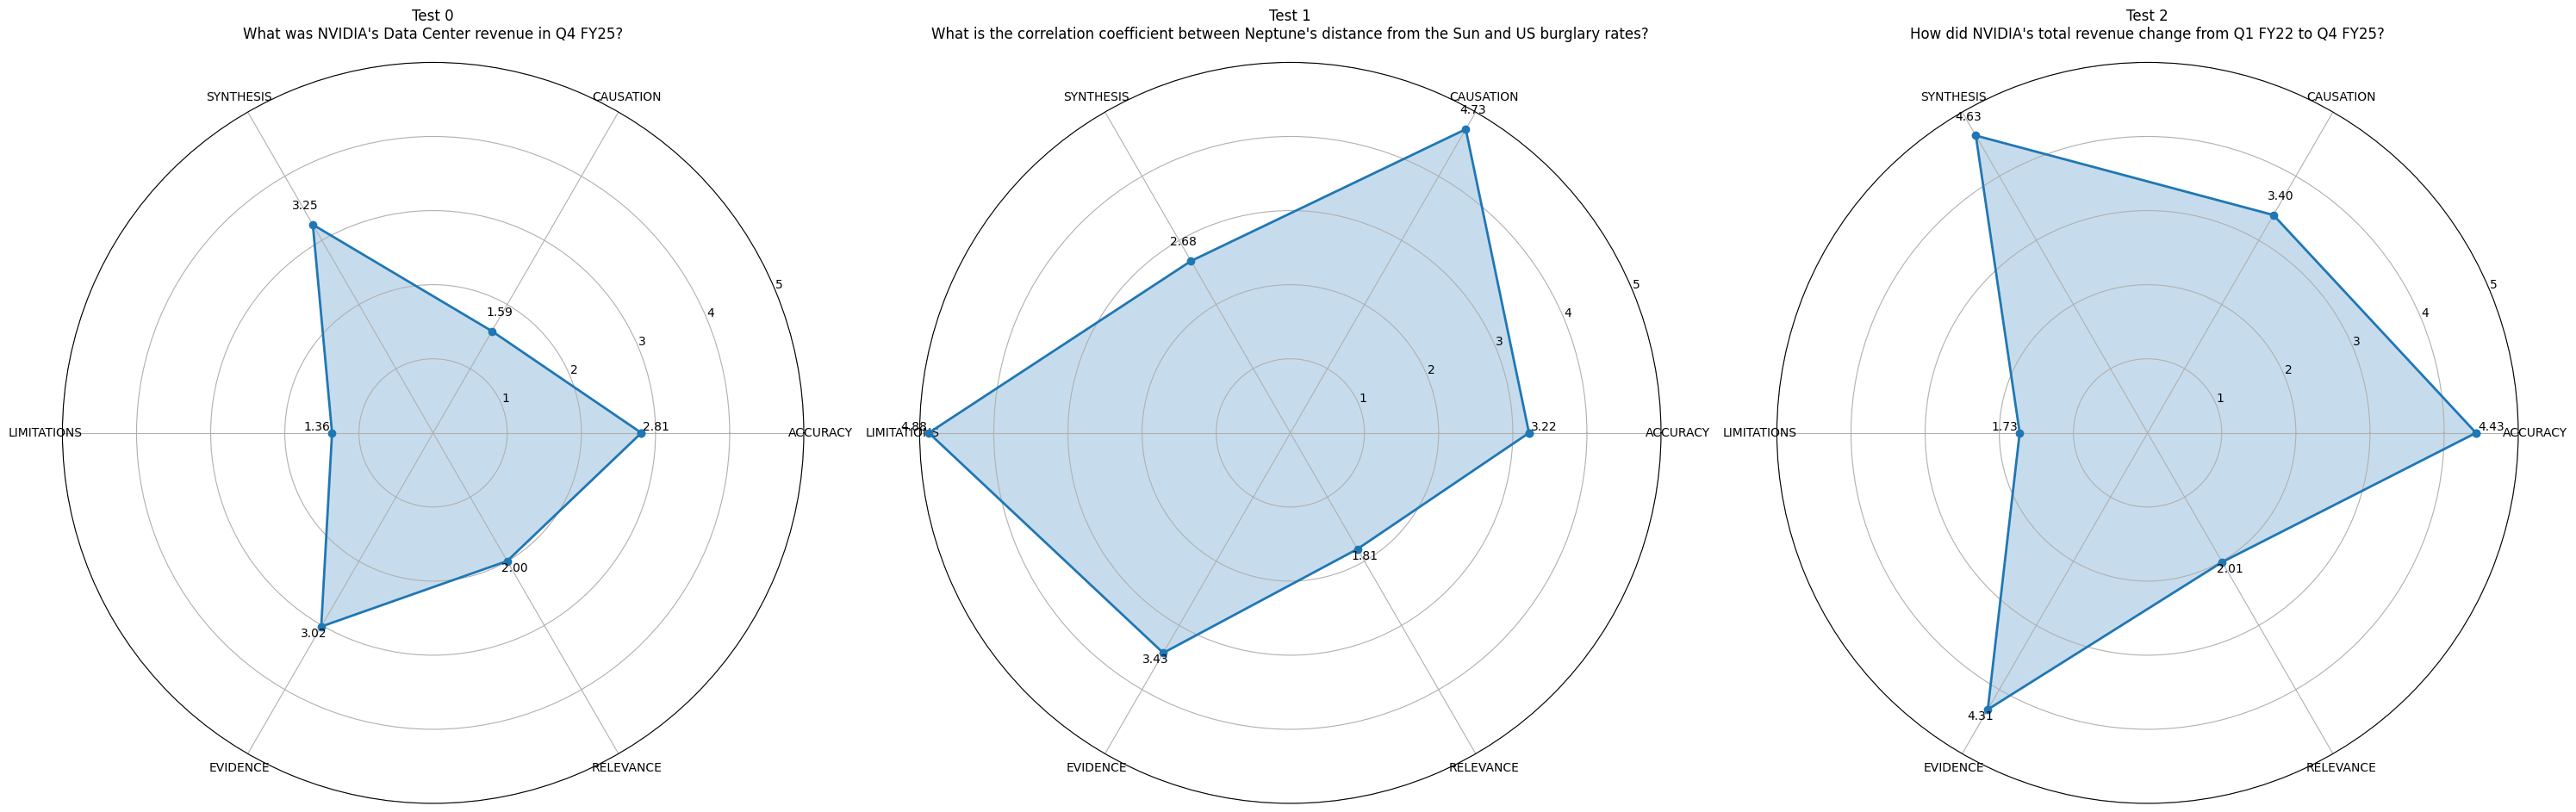

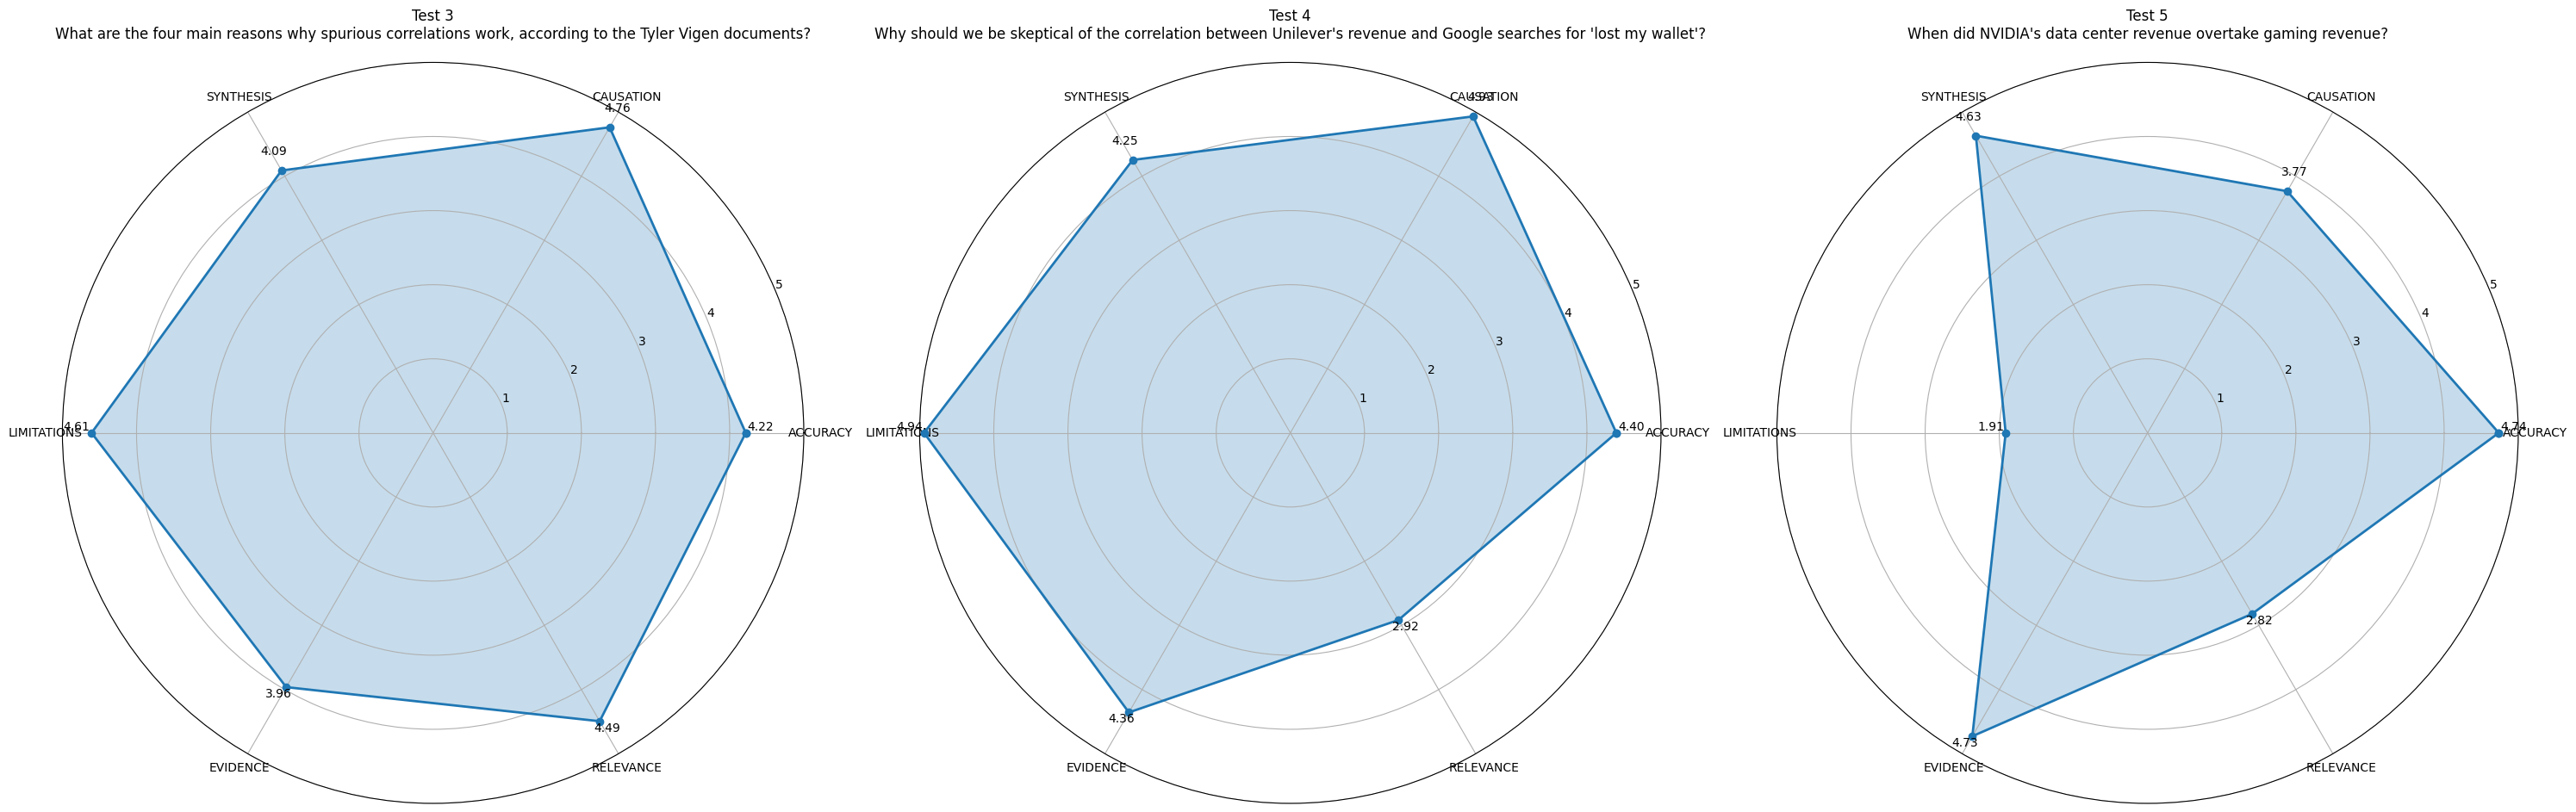

In [24]:
# For polar plots
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Tuple, Optional

#clustering analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def map_test_to_category(test_question: str) -> str:
    """Map the full test question to its category."""
    category_mapping = {
        'Does the response accurately extract specific numerical data': 'ACCURACY',
        'Does the agent properly distinguish between correlation and causation': 'CAUSATION',
        'Are multi-document comparisons performed correctly': 'SYNTHESIS',
        'Are potential limitations or uncertainties in the data': 'LIMITATIONS',
        'Are quantitative claims properly supported with specific evidence': 'EVIDENCE',
        'Does the response avoid unnecessary information': 'RELEVANCE'
    }

    for key, value in category_mapping.items():
        if key.lower() in test_question.lower():
            return value
    return None

def create_unit_test_plots(results: List[Dict],
                          test_indices: Optional[Union[int, List[int]]] = None,
                          figsize: tuple = (10, 10)):
    """
    Create polar plot(s) for unit test results. Can plot either a single test,
    specific multiple tests, or all tests in a row.

    Args:
        results: List of dictionaries containing test results
        test_indices: Optional; Either:
            - None (plots all results)
            - int (plots single result)
            - List[int] (plots multiple specific results)
        figsize: Tuple specifying the figure size (width, height)
    """
    # Handle different input cases for test_indices
    if test_indices is None:
        indices_to_plot = list(range(len(results)))
    elif isinstance(test_indices, int):
        if test_indices >= len(results):
            raise IndexError(f"test_index {test_indices} is out of range. Only {len(results)} results available.")
        indices_to_plot = [test_indices]
    else:
        if not test_indices:
            raise ValueError("test_indices list cannot be empty")
        if max(test_indices) >= len(results):
            raise IndexError(f"test_index {max(test_indices)} is out of range. Only {len(results)} results available.")
        indices_to_plot = test_indices

    # Categories in desired order
    categories = ['ACCURACY', 'CAUSATION', 'SYNTHESIS',
                'LIMITATIONS', 'EVIDENCE', 'RELEVANCE']

    # Set up the angles for the polar plot
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # Close the plot

    # Calculate figure size based on number of plots
    num_plots = len(indices_to_plot)
    fig_width = figsize[0] * num_plots
    fig = plt.figure(figsize=(fig_width, figsize[1]))

    # Create a subplot for each result
    for plot_idx, result_idx in enumerate(indices_to_plot):
        result = results[result_idx]

        # Create subplot
        ax = plt.subplot(1, num_plots, plot_idx + 1, projection='polar')

        # Get scores for this result
        scores = []
        for category in categories:
            score = None
            for test_result in result['test_results']:
                mapped_category = map_test_to_category(test_result['test'])
                if mapped_category == category:
                    score = test_result['score']
                    break
            scores.append(score if score is not None else 0)

        # Close the scores array
        scores = np.concatenate((scores, [scores[0]]))

        # Plot the scores
        ax.plot(angles, scores, 'o-', linewidth=2)
        ax.fill(angles, scores, alpha=0.25)

        # Set the labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)

        # Set the scale
        ax.set_ylim(0, 5)

        # Add grid
        ax.grid(True)

        # Add score values as annotations
        for angle, score, category in zip(angles[:-1], scores[:-1], categories):
            ax.text(angle, score + 0.2, f'{score:.2f}',
                    ha='center', va='bottom')

        # Add title for each subplot
        prompt = result['prompt']
        ax.set_title(f"Test {result_idx}\n{prompt}", pad=20)

    plt.tight_layout()
    return fig

# Plot the test results
fig = create_unit_test_plots(results, test_indices=[0, 1, 2])
fig = create_unit_test_plots(results, test_indices=[3, 4, 5])
